In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import kurtosis, skew,norm
import numpy as np
from pandas.io.json import json_normalize

In [2]:
def abrir_datos(url):
    with open(url, 'r') as f:
        json_data = json.load(f)
    dfs = []
    for data in json_data:
        tickers_data = data.pop('tickers')
        for ticker, ticker_data in tickers_data.items():
            df_ticker = json_normalize(ticker_data)
            df_ticker.insert(0, 'ticker', ticker)
            df_ticker.insert(1, 'horario_muestreo_datos', data['horario_muestreo_datos'])
            df_ticker.insert(2, 'caucion_a_un_dia_ultimo_trade_tasa', data['caucion_a_un_dia']['ultimo_trade'][0])
            df_ticker.insert(3, 'caucion_a_un_dia_ultimo_trade_monto', data['caucion_a_un_dia']['ultimo_trade'][1])
            dfs.append(df_ticker)
    result = pd.concat(dfs, ignore_index=True)
    return result


def limpiar_datos(df):
    columns_to_process = [
        'COLOCAR_TASA_ABRIENDO_PLAZO_CERCANO',
        'COLOCAR_TASA_ABRIENDO_PLAZO_LEJANO',
        'TOMAR_TASA_ABRIENDO_PLAZO_CERCANO',
        'TOMAR_TASA_ABRIENDO_PLAZO_LEJANO'
    ]

    for column in columns_to_process:
        #tasa_column = column + "_TASA"
        volume_column = column + "_VOLUMEN"
        #df[tasa_column] = df[column].apply(lambda x: x[0][0] if len(x) > 0 else None)
        df[volume_column] = df[column].apply(lambda x: x[0][1] if len(x) > 0 else None)

    df.rename(columns={'horario_muestreo_datos': 'fecha'}, inplace=True)
    df.set_index("fecha",inplace=True)
    df.drop(columns=columns_to_process, inplace=True)
    return df


def adf_test(time_series):
    result = adfuller(time_series)
    print("ADF Statistic: %f" % result[0])
    print("p-value: %f" % result[1])
    print("Critical Values:")
    for key, value in result[4].items():
        print("\t%s: %.3f" % (key, value))



In [3]:
df=abrir_datos(url="/Users/rogarciag/Desktop/AI_&_TRADING/ALGORITHMIC_TRADING/PRINCIPAL/NASINI/TRABAJOS_GENERAL/ANALISIS_DATOS/BASES_DE_DATOS/datos_completos.json")

/var/folders/nj/vt_f4yq17yx2llk4g9ysrl280000gn/T/ipykernel_44619/1545265637.py:8: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df_ticker = json_normalize(ticker_data)


In [4]:
AL30D_N = df[df['ticker'] == 'AL30D'].reset_index(drop=True)
GD30D_N = df[df['ticker'] == 'GD30D'].reset_index(drop=True)
AL30_N = df[df['ticker'] == 'AL30'].reset_index(drop=True)
GD30_N = df[df['ticker'] == 'GD30'].reset_index(drop=True)

In [5]:
AL30D=limpiar_datos(AL30D_N)
AL30=limpiar_datos(AL30_N)
GD30D=limpiar_datos(GD30D_N)
GD30=limpiar_datos(GD30_N)

In [6]:
dato_muestra=GD30

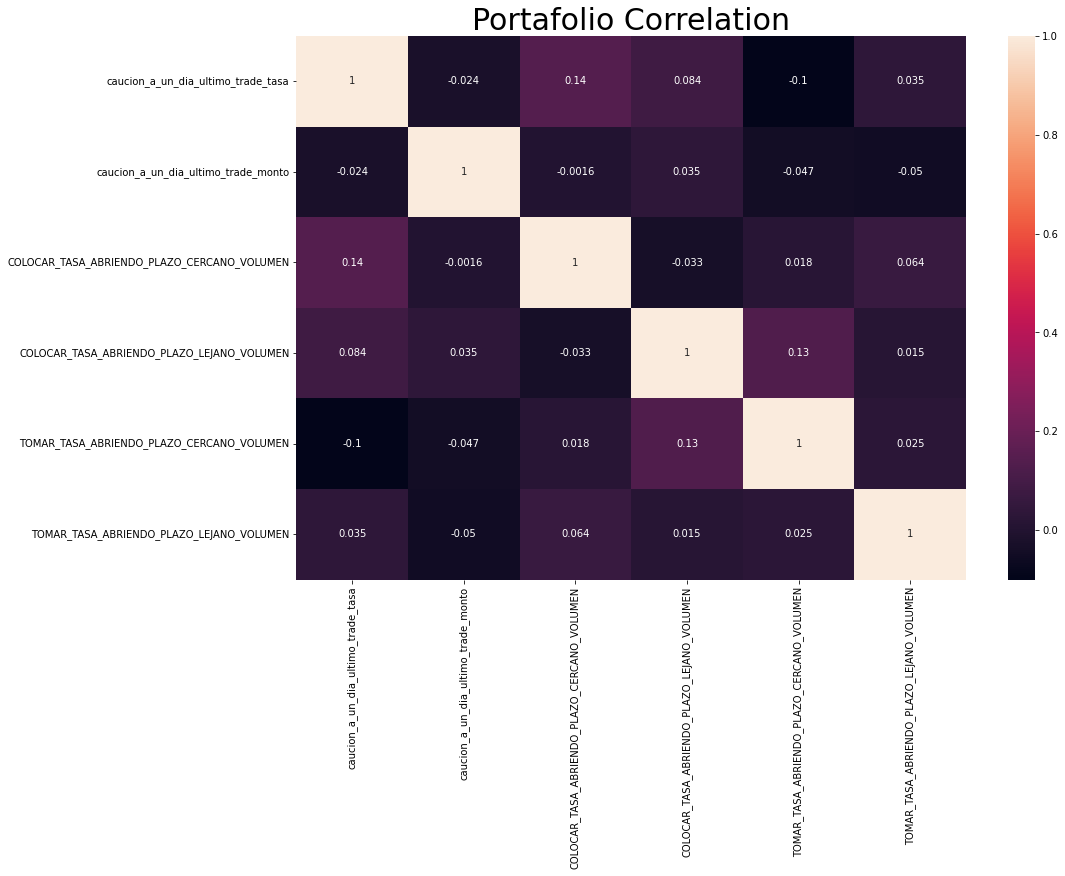

In [7]:
correlation_mat = dato_muestra.corr()
plt.figure(figsize=(15,10))
sns.heatmap(correlation_mat, annot=True)
plt.title("Portafolio Correlation", fontsize=30)
plt.show()

Text(0.5, 1.0, 'Tomar Volumen Abriendo Cercano vs Tomar Volumen Abriendo Lejano')

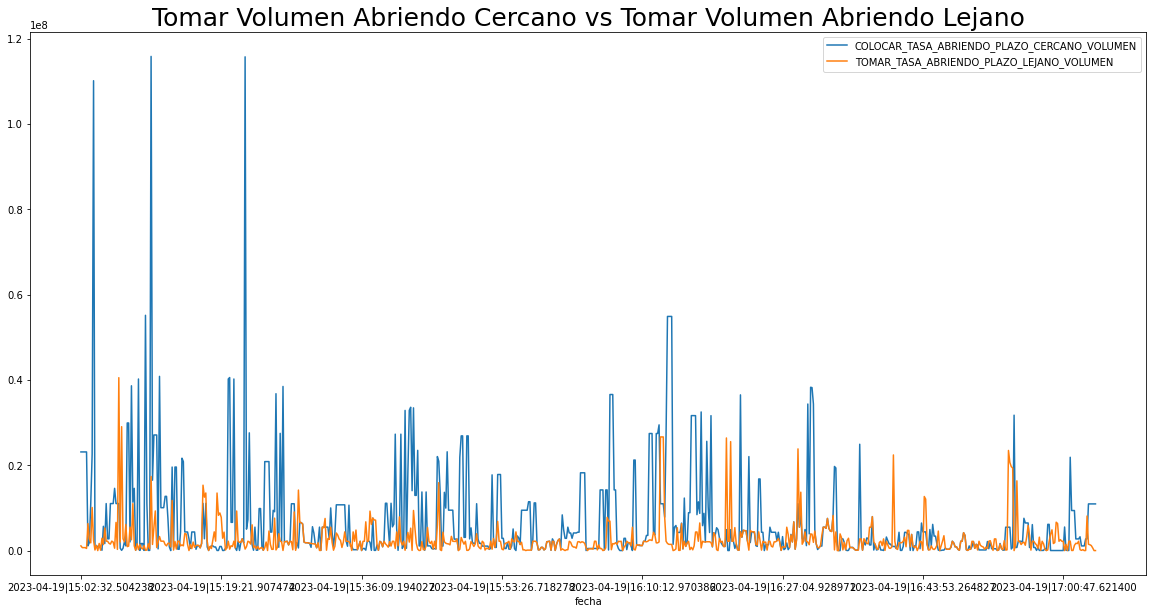

In [8]:
dato_muestra[["COLOCAR_TASA_ABRIENDO_PLAZO_CERCANO_VOLUMEN","TOMAR_TASA_ABRIENDO_PLAZO_LEJANO_VOLUMEN"]].plot(figsize=(20,10))
plt.title("Tomar Volumen Abriendo Cercano vs Tomar Volumen Abriendo Lejano", fontsize=25)

Text(0.5, 1.0, 'Tomar Volumen Abriendo Cercano vs Tomar Volumen Abriendo Lejano')

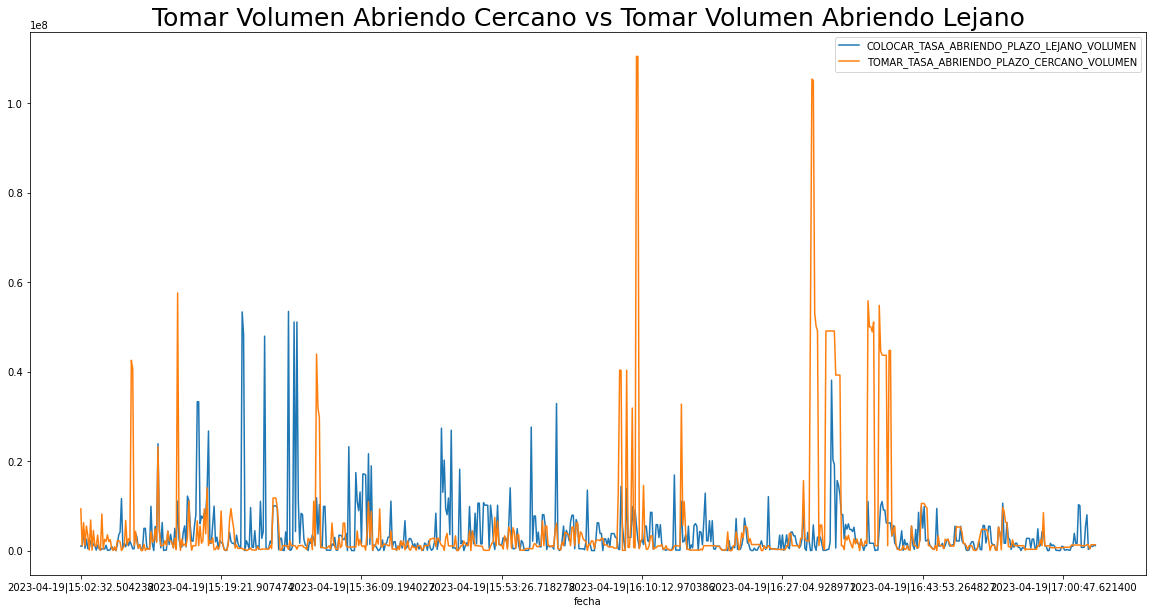

In [9]:
dato_muestra[["COLOCAR_TASA_ABRIENDO_PLAZO_LEJANO_VOLUMEN","TOMAR_TASA_ABRIENDO_PLAZO_CERCANO_VOLUMEN"]].plot(figsize=(20,10))
plt.title("Tomar Volumen Abriendo Cercano vs Tomar Volumen Abriendo Lejano", fontsize=25)

# ANALISIS DE DISTRIBUCION DE VOLUMEN

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


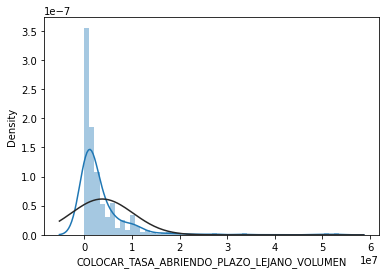

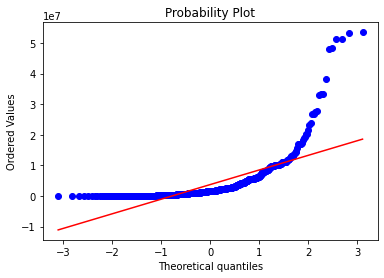

In [10]:
sns.distplot(dato_muestra["COLOCAR_TASA_ABRIENDO_PLAZO_LEJANO_VOLUMEN"], fit=norm);
fig = plt.figure()
res = stats.probplot(dato_muestra["COLOCAR_TASA_ABRIENDO_PLAZO_LEJANO_VOLUMEN"], plot=plt)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


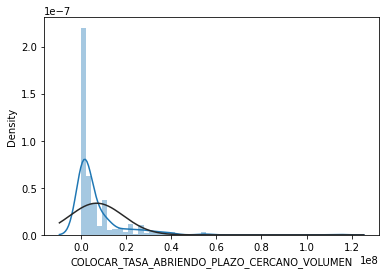

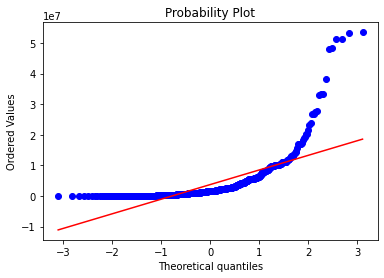

In [11]:
sns.distplot(dato_muestra["COLOCAR_TASA_ABRIENDO_PLAZO_CERCANO_VOLUMEN"], fit=norm);
fig = plt.figure()
res = stats.probplot(dato_muestra["COLOCAR_TASA_ABRIENDO_PLAZO_LEJANO_VOLUMEN"], plot=plt)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


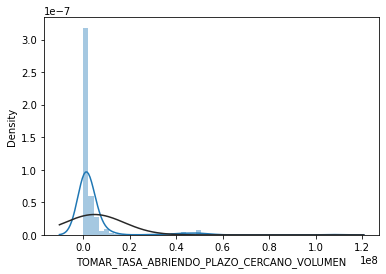

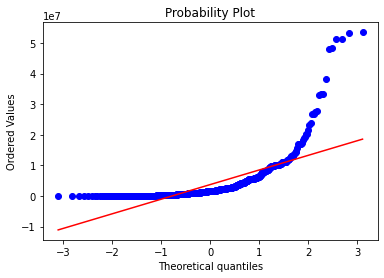

In [12]:
sns.distplot(dato_muestra["TOMAR_TASA_ABRIENDO_PLAZO_CERCANO_VOLUMEN"], fit=norm);
fig = plt.figure()
res = stats.probplot(dato_muestra["COLOCAR_TASA_ABRIENDO_PLAZO_LEJANO_VOLUMEN"], plot=plt)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


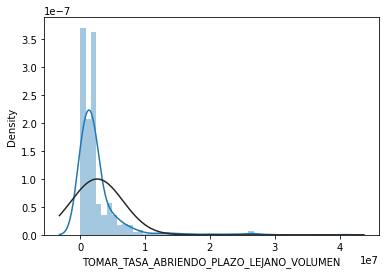

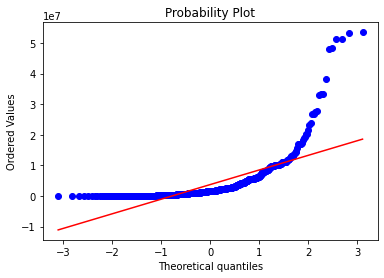

In [13]:
sns.distplot(dato_muestra["TOMAR_TASA_ABRIENDO_PLAZO_LEJANO_VOLUMEN"], fit=norm);
fig = plt.figure()
res = stats.probplot(dato_muestra["COLOCAR_TASA_ABRIENDO_PLAZO_LEJANO_VOLUMEN"], plot=plt)

# ESTADISTICAS EN GENERAL

In [14]:
np.var(dato_muestra["TOMAR_TASA_ABRIENDO_PLAZO_LEJANO_VOLUMEN"])

15980546653093.275

In [15]:
dato_muestra["TOMAR_TASA_ABRIENDO_PLAZO_LEJANO_VOLUMEN"].min()

109.55

In [16]:
dato_muestra["TOMAR_TASA_ABRIENDO_PLAZO_LEJANO_VOLUMEN"].max()

40522312.45

In [22]:
dato_muestra["TOMAR_TASA_ABRIENDO_PLAZO_LEJANO_VOLUMEN"].mean()

2607189.3446063506

In [23]:
dato_muestra["TOMAR_TASA_ABRIENDO_PLAZO_LEJANO_VOLUMEN"].median()

1813612.26

# ANALISIS DE DISTRIBUCION DE CAMBIO PORCENTUAL VOLUMEN

In [17]:
dato_muestra["PCT_CHANGE_TOMAR_LEJANO_VOLUMEN"]=dato_muestra["TOMAR_TASA_ABRIENDO_PLAZO_LEJANO_VOLUMEN"].pct_change()
dato_muestra["PCT_CHANGE_TOMAR_CERCANO_VOLUMEN"]=dato_muestra["TOMAR_TASA_ABRIENDO_PLAZO_CERCANO_VOLUMEN"].pct_change()
dato_muestra["PCT_CHANGE_COLOCAR_LEJANO_VOLUMEN"]=dato_muestra["COLOCAR_TASA_ABRIENDO_PLAZO_LEJANO_VOLUMEN"].pct_change()
dato_muestra["PCT_CHANGE_COLOCAR_CERCANO_VOLUMEN"]=dato_muestra["COLOCAR_TASA_ABRIENDO_PLAZO_CERCANO_VOLUMEN"].pct_change()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


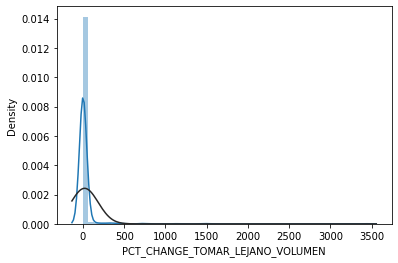

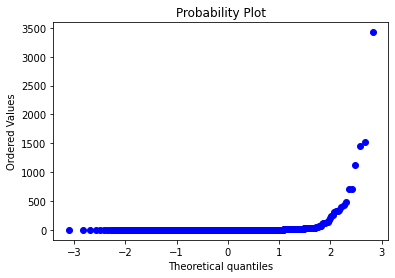

In [18]:
sns.distplot(dato_muestra["PCT_CHANGE_TOMAR_LEJANO_VOLUMEN"], fit=norm);
fig = plt.figure()
res = stats.probplot(dato_muestra["PCT_CHANGE_TOMAR_LEJANO_VOLUMEN"], plot=plt)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


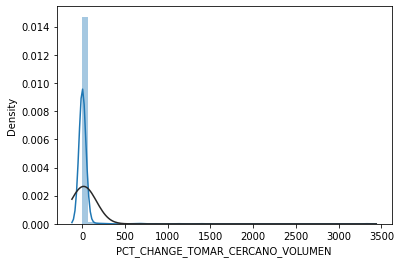

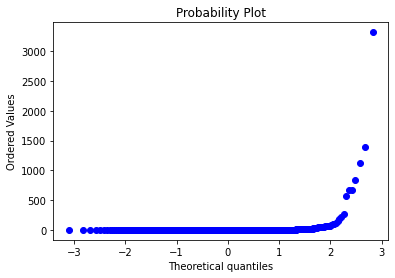

In [19]:
sns.distplot(dato_muestra["PCT_CHANGE_TOMAR_CERCANO_VOLUMEN"], fit=norm);
fig = plt.figure()
res = stats.probplot(dato_muestra["PCT_CHANGE_TOMAR_CERCANO_VOLUMEN"], plot=plt)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


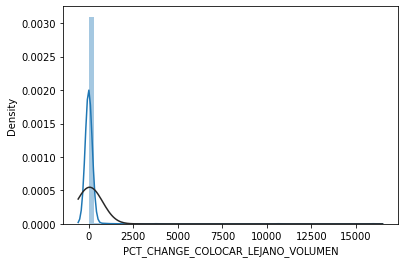

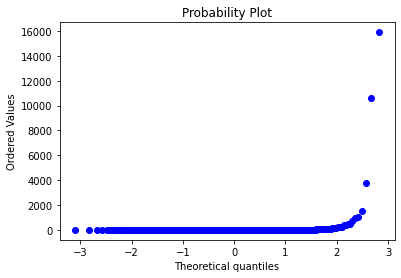

In [20]:
sns.distplot(dato_muestra["PCT_CHANGE_COLOCAR_LEJANO_VOLUMEN"], fit=norm);
fig = plt.figure()
res = stats.probplot(dato_muestra["PCT_CHANGE_COLOCAR_LEJANO_VOLUMEN"], plot=plt)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


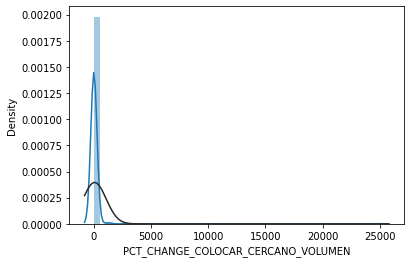

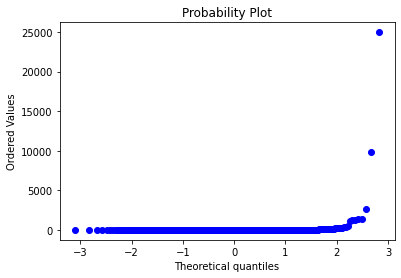

In [21]:
sns.distplot(dato_muestra["PCT_CHANGE_COLOCAR_CERCANO_VOLUMEN"], fit=norm);
fig = plt.figure()
res = stats.probplot(dato_muestra["PCT_CHANGE_COLOCAR_CERCANO_VOLUMEN"], plot=plt)